In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("ecommerce_data.csv")

In [3]:
df.head()

,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,time_of_day,user_action
0,1,0,0.657510,0,3,0
1,1,1,0.568571,0,2,1
2,1,0,0.042246,1,1,0
3,1,1,1.659793,1,1,2
4,0,1,2.014745,1,1,2


## One hot enconding

In [25]:
Y = np.zeros((N, 4))

for i in range(N):
    Y[i, y[i]] = 1

NameError: name 'y' is not defined

## Stratification

In [53]:
bounce = df.loc[df["user_action"] ==0]
addcart = df.loc[df["user_action"] ==1]
checkout = df.loc[df["user_action"] ==2]
complete = df.loc[df["user_action"] ==3]


In [54]:
btrain = bounce[:int(len(bounce)*0.6)]
addtrain = addcart[:int(len(addcart)*0.6)]
checktrain = checkout[:int(len(checkout)*0.6)]
buytrain = complete[:int(len(complete)*0.6)]

bval = bounce[int(len(bounce)*0.6):int(len(bounce)*0.8)]
addval = addcart[int(len(addcart)*0.6):int(len(addcart)*0.8)]
checkval = checkout[int(len(checkout)*0.6):int(len(checkout)*0.8)]
buyval = complete[int(len(complete)*0.6):int(len(complete)*0.8)]

btest = bounce[int(len(bounce)*0.8):]
addtest = addcart[int(len(addcart)*0.8):]
checktest = checkout[int(len(checkout)*0.8):]
buytest = complete[int(len(complete)*0.8):]

## Splitting the data into Train, Validation and Test

In [55]:
frames = [btrain, addtrain, checktrain, buytrain]
dftrain = pd.concat(frames, ignore_index=True)


fval = [bval, addval, checkval, buyval]
dfval = pd.concat(fval, ignore_index=True)

ftest = [btest, addtest, checktest, buytest]
dftest = pd.concat(ftest, ignore_index=True)

## Making my data Binary


dftrain['user_action'] = dftrain['user_action'].replace([0,1,2], 0)
dftrain['user_action'] = dftrain['user_action'].replace(3, 1)

dfval['user_action'] = dfval['user_action'].replace([0,1,2], 0)
dfval['user_action'] = dfval['user_action'].replace(3, 1)

dftest['user_action'] = dftest['user_action'].replace([0,1,2], 0)
dftest['user_action'] = dftest['user_action'].replace(3, 1)

#Another way of doing it is creating a boolean vector and then converting it as an int.
'''(df['user_action'] == 3).astype(int)
'''

In [57]:
X = np.array(dftrain.iloc[:,:5])
PHI = np.column_stack((np.array([[1]*len(dftrain)]).T, X))
y = np.array(dftrain.iloc[:,5])

Xval = np.array(dfval.iloc[:,:5])
PHIval = np.column_stack((np.array([[1]*len(dfval)]).T, Xval))
yval = np.array(dfval.iloc[:,5])

Xtest = np.array(dftest.iloc[:,:5])
PHItest = np.column_stack((np.array([[1]*len(dftest)]).T, Xtest))
ytest = np.array(dftest.iloc[:,5])



In [58]:
# Functions

def sigmoid(h):
    return 1 / (1 + np.exp(-h))

def cross_entropy(y, p):
    return -np.mean(y*np.log(p) + (1-y)*np.log(1-p))

def classification_rate(y, p):
    return np.mean(y == np.round(p))

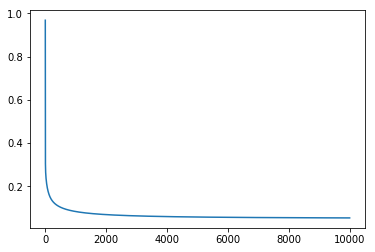

In [143]:
# Build the Model

w = np.random.rand(6)

J = []
eta = 3e-1
epochs = int(1e4)

for t in range(epochs):
    p = sigmoid(PHI.dot(w))
    J.append(cross_entropy(y, p))
    w -= eta*(1/len(dftrain))*PHI.T.dot(p - y)
    
#plt.figure(figsize=(12,9))
plt.plot(J)

## Training Set

In [129]:
w

array([-12.58971985,   1.85005703,   2.1987113 ,   2.11632834,
         3.73524162,  -1.15188008])

In [139]:
#print("Classification Rate: {}".format(classification_rate(y, p)))

#Confusion Matrix
train_confusion = pd.crosstab(y, np.round(p), rownames=['Actual'], colnames=['Predicted'], margins=True)

#Proportion Confusion Matrix
train_conf_prop = train_confusion / len(y)

#Normalised Confusion Matrix
train_conf_norm = train_confusion / train_confusion.sum(axis=1)

print(train_confusion)

Precision = train_confusion.iloc[1,1] / train_confusion.iloc[2,1] 
print("Precision: {}".format(Precision))

Recall = train_confusion.iloc[1,1] / train_confusion.iloc[1,2]
print("Recall: {}".format(Recall))

F1 = (2*Precision*Recall)/ (Precision + Recall)
print("F1: {}".format(F1))

Predicted  0.0  1.0  All
Actual                  
0          282    2  284
1            6    9   15
All        288   11  299
Precision: 0.8181818181818182
Recall: 0.6
F1: 0.6923076923076923


Text(0.5,1,'ROC/AUC')

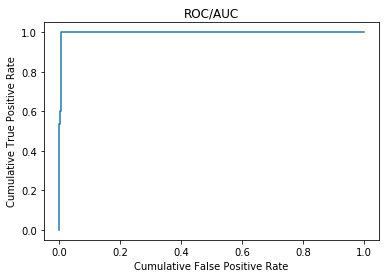

In [147]:
# ROC/AUC

roc_matrix = np.column_stack((p, np.round(p), y))
roc_matrix = roc_matrix[roc_matrix[:,0].argsort()[::-1]]

tp = np.cumsum((roc_matrix[:,1] == 1) & (roc_matrix[:,2] == 1)) / np.sum(roc_matrix[:,2] == 1)
fp = np.cumsum((roc_matrix[:,1] == 1) & (roc_matrix[:,2] == 0)) / np.sum(roc_matrix[:,2] == 0)

tp = np.array([0] + tp.tolist() + [1])
fp = np.array([0] + fp.tolist() + [1])


plt.step(fp, tp)
plt.xlabel("Cumulative False Positive Rate")
plt.ylabel("Cumulative True Positive Rate")
plt.title("ROC/AUC")


In [145]:
roc_matrix2 = np.column_stack((p, np.round(p), y))
Recall2 = np.sum((roc_matrix2[:,1] == 1) & (roc_matrix2[:,2] == 1)) / np.sum(roc_matrix2[:,2] == 1)
fp2 = np.sum((roc_matrix2[:,1] == 1) & (roc_matrix2[:,2] == 0)) / np.sum(roc_matrix2[:,2] == 0)



In [146]:
auc = np.sum(w*h for h, w in zip(tp[1:], [b-a for a, b in zip(fp, fp[1:])]))

print("ROC/AUC: {}".format(auc))

ROC/AUC: 0.9969483568075117


## Validation Set

In [130]:
w_l2 = np.array([-3.38645812e+30, 1.00044637e+29, 7.54121589e+29, 7.70138256e+29, 5.27979704e+29, -5.13573328e+29])

In [131]:
pval = sigmoid(PHIval.dot(w_l2))
#print("Classification Rate: {}".format(classification_rate(yval, pval)))

#Confusion Matrix
val_confusion = pd.crosstab(yval, np.round(pval), rownames=['Actual'], colnames=['Predicted'], margins=True)

#Proportion Confusion Matrix
val_conf_prop = val_confusion / len(yval)

#Normalised Confusion Matrix
val_conf_norm = val_confusion / val_confusion.sum(axis=1)

print(val_confusion)

Precision = val_confusion.iloc[1,1] / val_confusion.iloc[2,1] 
print("Precision Validation: {}".format(Precision))

Recall = val_confusion.iloc[1,1] / val_confusion.iloc[1,2]
print("Recall Validation: {}".format(Recall))

Predicted  0.0  1.0  All
Actual                  
0           95    0   95
1            4    1    5
All         99    1  100
Precision Validation: 1.0
Recall Validation: 0.2


Text(0.5,1,'ROC/AUC Validation')

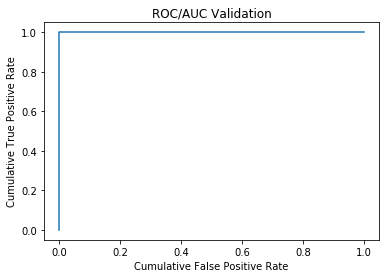

In [149]:
# ROC/AUC

roc_matrix2 = np.column_stack((pval, np.round(pval), yval))
roc_matrix2 = roc_matrix2[roc_matrix2[:,0].argsort()[::-1]]

tpval = np.cumsum((roc_matrix2[:,1] == 1) & (roc_matrix2[:,2] == 1)) / np.sum(roc_matrix2[:,2] == 1)
fpval = np.cumsum((roc_matrix2[:,1] == 1) & (roc_matrix2[:,2] == 0)) / np.sum(roc_matrix2[:,2] == 0)

tpval = np.array([0] + tpval.tolist() + [1])
fpval = np.array([0] + fpval.tolist() + [1])

#plt.figure(figsize = (12,9))
plt.step(fpval, tpval)
plt.xlabel("Cumulative False Positive Rate")
plt.ylabel("Cumulative True Positive Rate")
plt.title("ROC/AUC Validation")

## Test Set

In [150]:
ptest = sigmoid(PHItest.dot(w))
#print("Classification Rate: {}".format(classification_rate(ytest, ptest)))

#Confusion Matrix
test_confusion = pd.crosstab(ytest, np.round(ptest), rownames=['Actual'], colnames=['Predicted'], margins=True)

#Proportion Confusion Matrix
test_conf_prop = test_confusion / len(ytest)

#Normalised Confusion Matrix
test_conf_norm = test_confusion / test_confusion.sum(axis=1)

print(test_confusion)

Precision = test_confusion.iloc[1,1] / test_confusion.iloc[2,1] 
print("Precision Validation: {}".format(Precision))

Recall = test_confusion.iloc[1,1] / test_confusion.iloc[1,2]
print("Recall Validation: {}".format(Recall))

Predicted  0.0  1.0  All
Actual                  
0           95    1   96
1            2    3    5
All         97    4  101
Precision Validation: 0.75
Recall Validation: 0.6


Text(0.5,1,'ROC/AUC Test')

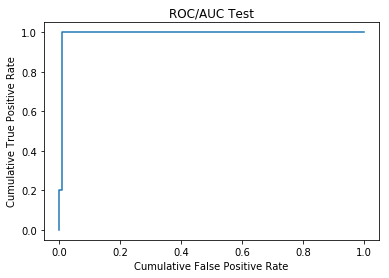

In [152]:
# ROC/AUC

roc_matrix3 = np.column_stack((ptest, np.round(ptest), ytest))
roc_matrix3 = roc_matrix3[roc_matrix3[:,0].argsort()[::-1]]

tptest = np.cumsum((roc_matrix3[:,1] == 1) & (roc_matrix3[:,2] == 1)) / np.sum(roc_matrix3[:,2] == 1)
fptest = np.cumsum((roc_matrix3[:,1] == 1) & (roc_matrix3[:,2] == 0)) / np.sum(roc_matrix3[:,2] == 0)

tptest = np.array([0] + tptest.tolist() + [1])
fptest = np.array([0] + fptest.tolist() + [1])

#plt.figure(figsize = (12,9))
plt.step(fptest, tptest)
plt.xlabel("Cumulative False Positive Rate")
plt.ylabel("Cumulative True Positive Rate")
plt.title("ROC/AUC Test")

## How to Plot Data

In [73]:
#Plot Confusion Matrix nicely

def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(df_confusion)

Predicted,0.0,1.0,All
Actual,,,
0,0.940594,0.009901,0.950495
1,0.019802,0.029703,0.049505
All,0.960396,0.039604,1.000000
